In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#modeling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

In [2]:
filename =  '../data/pubmed_vectorized_jargon.csv'

In [5]:
df = pd.read_csv(filename).set_index('pmid')

In [6]:
df.head()

,citations,fulltext,A/B testing,accuracy,action,activation function,active learning,AdaGrad,agent,agglomerative clustering,...,validation,validation set,vanishing gradient problem,Wasserstein loss,weight,Weighted Alternating Least Squares (WALS),wide model,width,total_jargon_count,log_citations
pmid,,,,,,,,,,,,,,,,,,,,,
22627698,35,extracting biological information computationa...,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,11,3.555348
22952238,4,uncovering transcription factor modules using ...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1.386294
22944687,19,understanding substrate specificity convention...,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,2.944439
22075226,12,membrane protein structural bioinformatics des...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2.484907
23012584,10,future medical diagnostics: large digitized da...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2.302585


In [8]:
X = df.drop(columns = ['citations', 'fulltext', 'log_citations'])
y = df['citations']

#### Look at Phrase Frequency in the Corpus

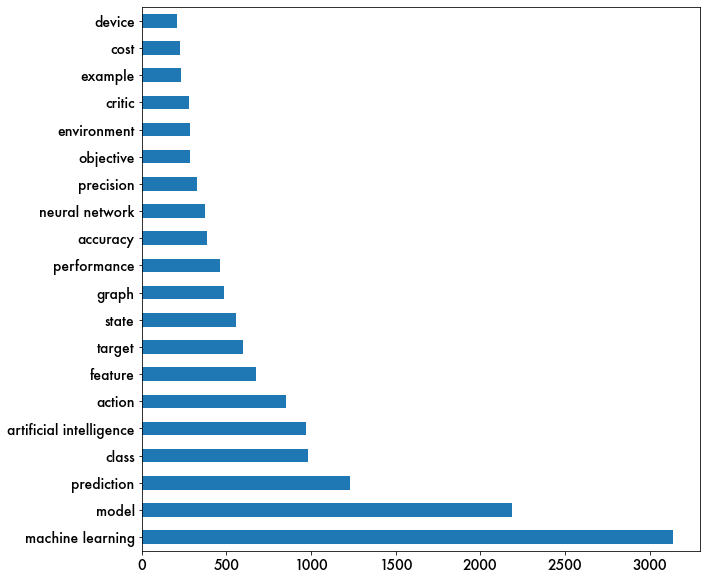

In [10]:
# plot top occurring words/phrases

#remove the total count for the plot
jargon_X = X.drop(columns='total_jargon_count')
plt.figure(figsize = (10,10))
jargon_X.sum().sort_values(ascending = False).head(20).plot(kind='barh');
figurefont = {'fontname' : 'Futura'}
plt.xticks(**figurefont, fontsize = 14);
plt.yticks(**figurefont, fontsize = 14);
plt.savefig('../figures/pubmed_top_occurring_jargon.jpg',  bbox_inches = "tight")

### Modeling Attempt I: Citations

In [11]:
#train-test split
X_train, X_test, y_train, y_test=train_test_split(X,
                                                 y,
                                                 test_size=.2,
                                                 random_state=42)

In [12]:
model_list = [
    LinearRegression(),
    DecisionTreeRegressor(),
    BaggingRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    SVR(),
]

results_list = []

for model_obj in model_list:
    #instantiate each model 
    model = model_obj
   
    #fit the model
    model.fit(X_train, y_train) 
  
    #create a dictionary with scores and evaluation metrics for each model
    results_dict = {}    
    results_dict['model_name'] = str(model_obj)
    results_dict['train_score'] = model.score(X_train, y_train)
    results_dict['test_score'] = model.score(X_test, y_test)
    results_dict['cv_score'] = cross_val_score(model, X_train, y_train, cv = 5).mean()
    results_dict['train_RMSE'] = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    results_dict['test_RMSE'] = np.sqrt(mean_squared_error(y_test, model.predict(X_test))) 
    
    #add the dictionary to the list
    results_list.append(results_dict)

In [13]:
results = pd.DataFrame(results_list)
results

,model_name,train_score,test_score,cv_score,train_RMSE,test_RMSE
0,LinearRegression(),0.107889,-3.854745e+18,-8.554226e+19,13.633553,3.364617e+10
1,DecisionTreeRegressor(),0.903520,-5.681028e-01,-1.006465e+00,4.483517,2.145977e+01
2,BaggingRegressor(),0.726274,-1.223815e-01,-2.296880e-01,7.551918,1.815549e+01
3,RandomForestRegressor(),0.769043,-7.729565e-02,-1.617014e-01,6.936890,1.778710e+01
4,AdaBoostRegressor(),-0.263098,-2.319613e-01,-5.518553e-01,16.222514,1.902113e+01
5,SVR(),-0.120087,-1.505261e-01,-1.359134e-01,15.276555,1.838171e+01


These are very poor results. None of these words account for the variance in the target variable. 